# Diabetes Patients - Predictive Analysis

# Data Collection

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading dataset

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The diabetes dataset contains columns ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

The column "Outcome" has values 0 and 1 representing if the person is Non Diabetic or Diabetic respectively

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Cleaning

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

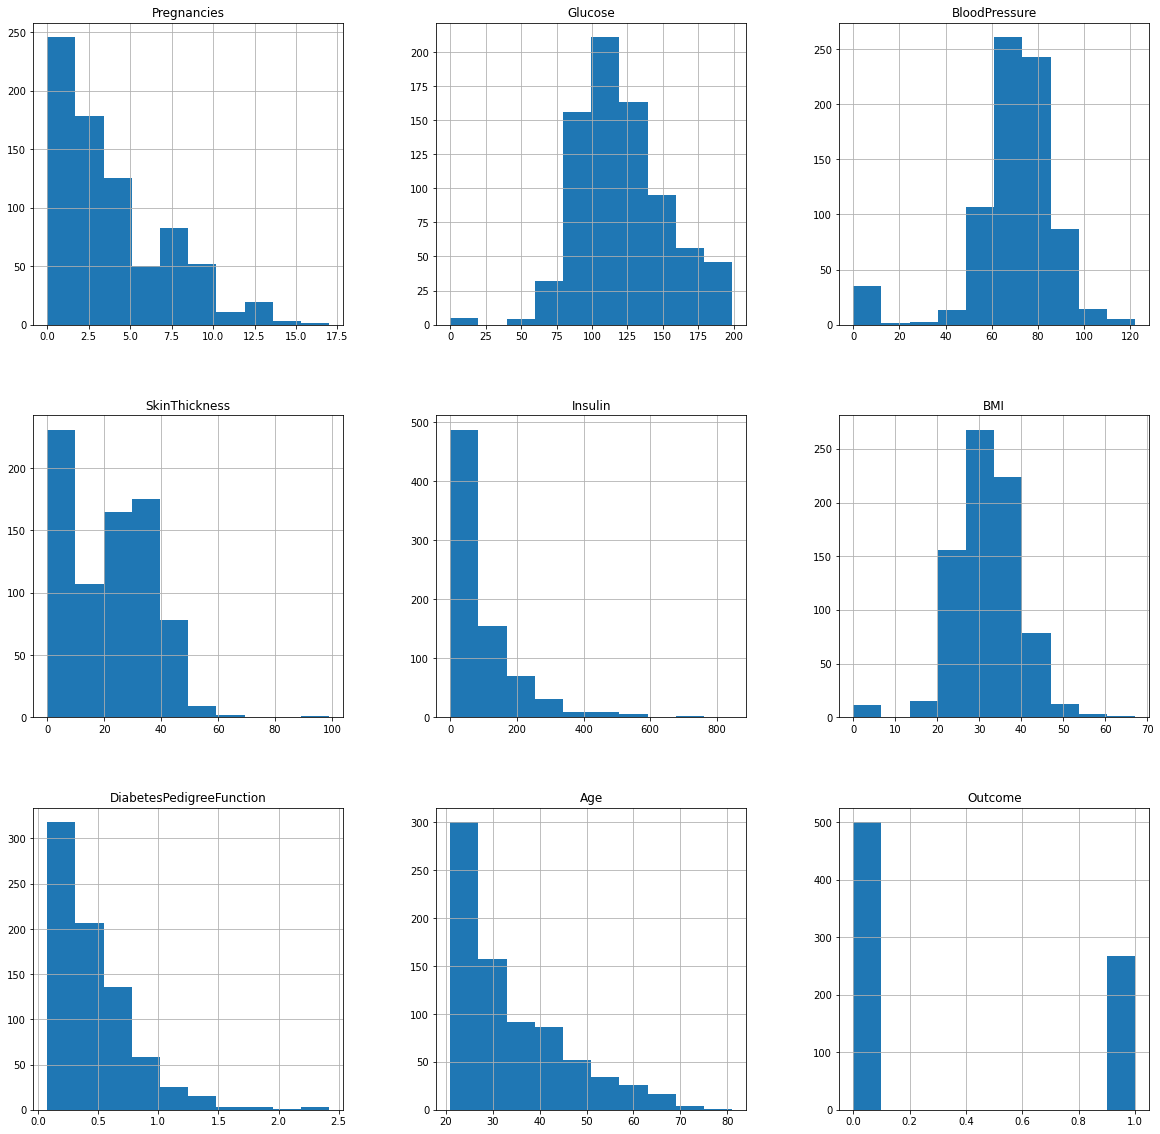

In [7]:
p = df.hist(figsize = (20,20))
p

In [8]:
# imputing the mean value of the column to each missing value of that particular column.

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

<AxesSubplot:>

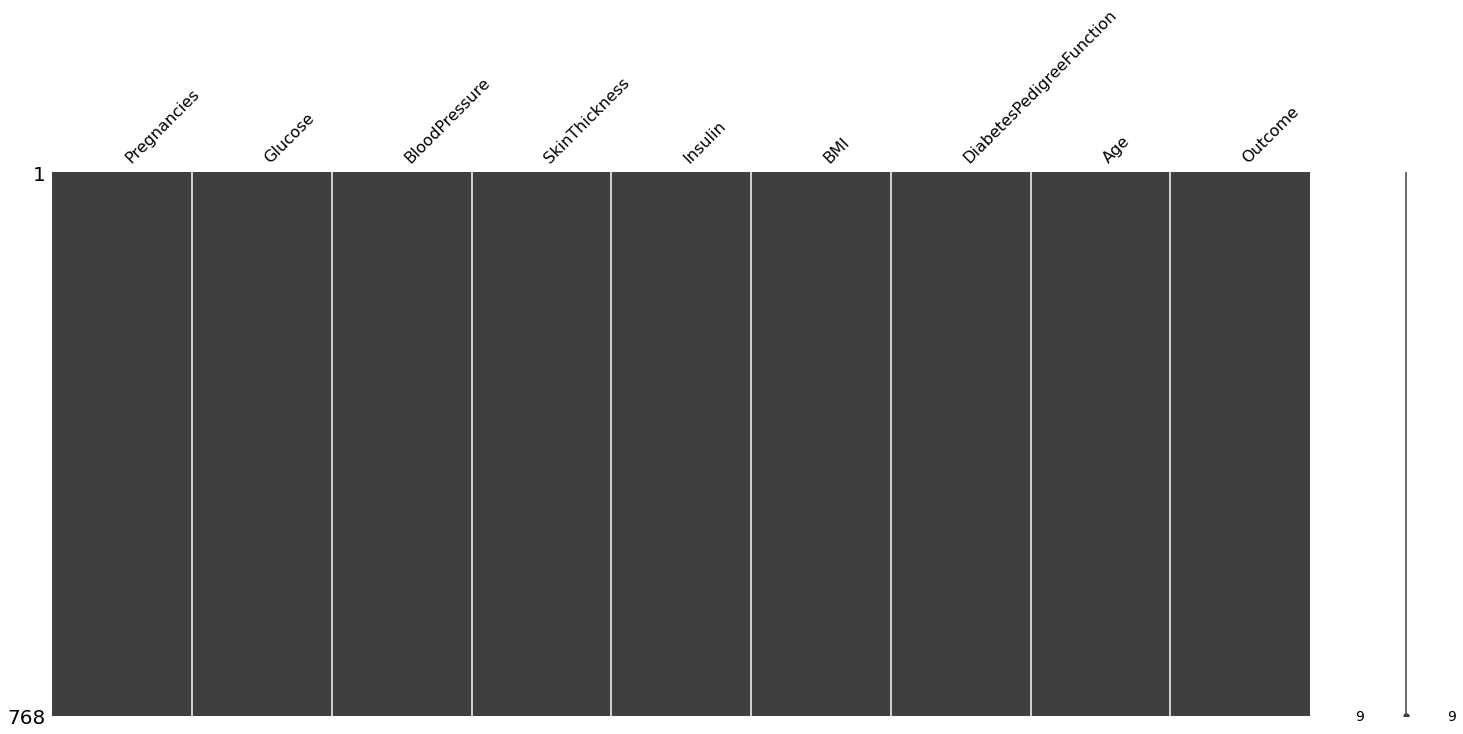

In [9]:
# Finding missing values in the dataset using matrix

import missingno as msno 
msno.matrix(df_copy) 

The graph shows that the dataset do not have any missing values

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

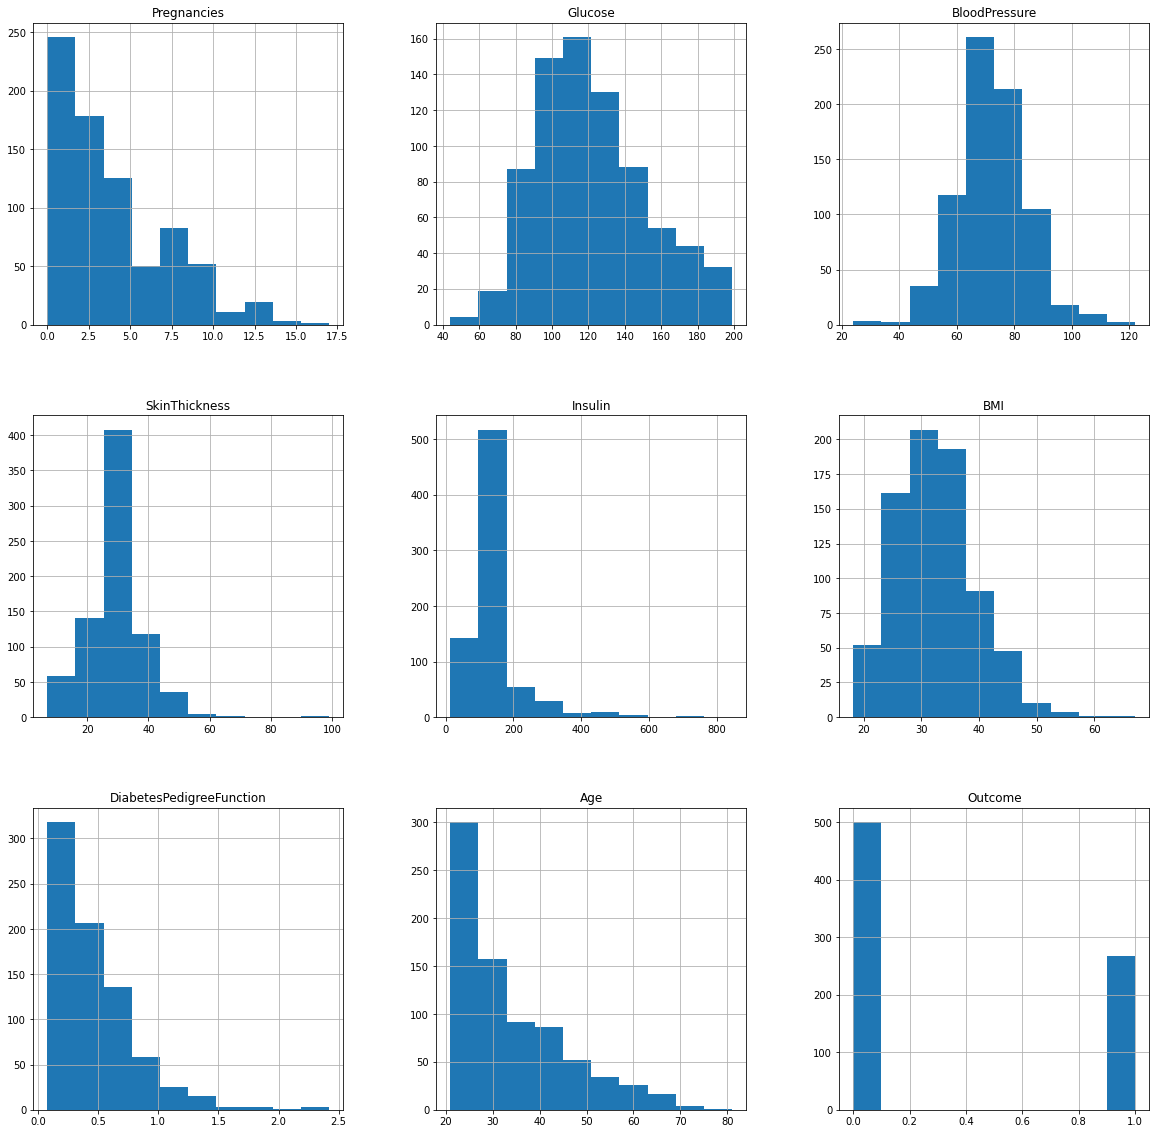

In [35]:
df_copy.hist(figsize = (20,20))

In [10]:
df_copy.shape

(768, 9)

The dataset contains 768 rows and 9 columns

<AxesSubplot:>

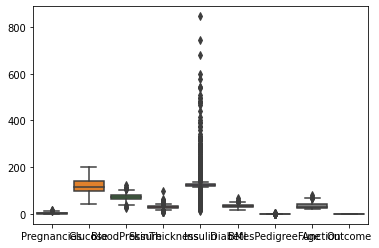

In [11]:
# Finding outliers in the dataset using boxplot

sns.boxplot(df_copy)

In [12]:
column = df_copy.columns
column

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

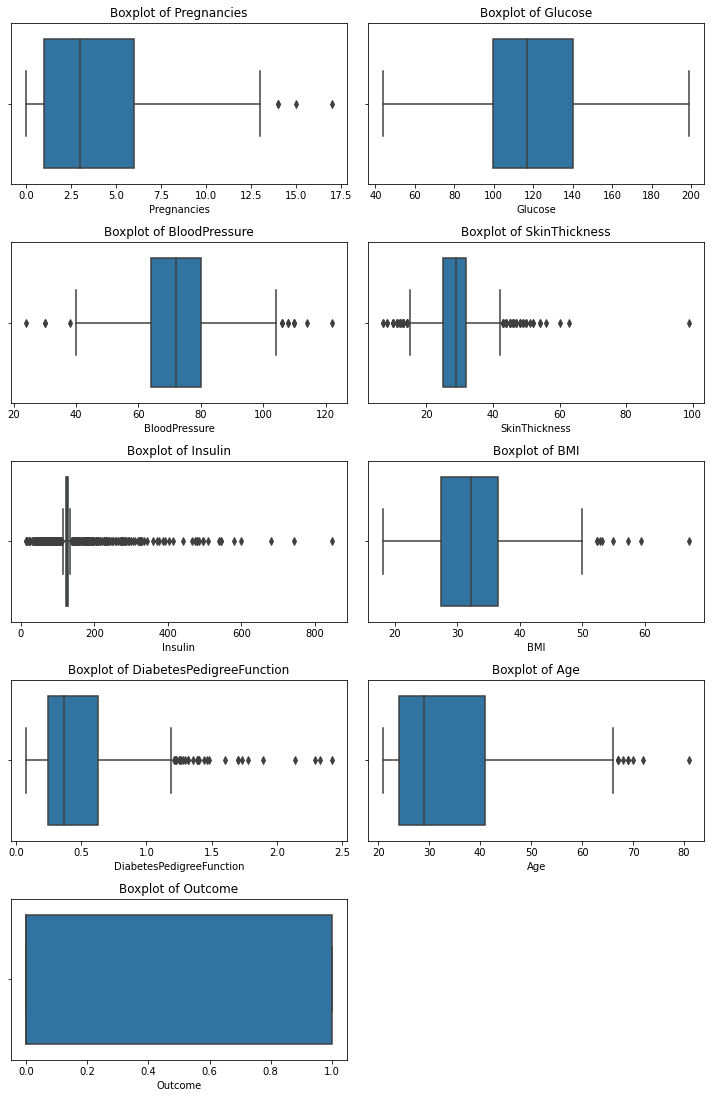

In [13]:
fig  = plt.figure(figsize = (10,21))
i = 1
for col in column:
    ax = plt.subplot(7,2,i)
    sns.boxplot(x = df_copy[col])
    plt.title(f'Boxplot of {col}')
    i += 1
    
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

## Correlation Matrix

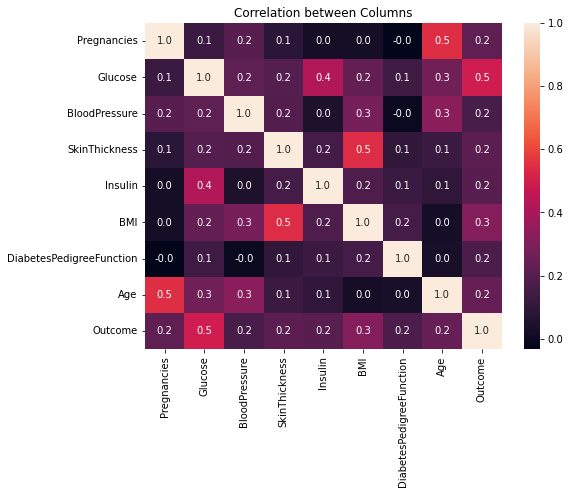

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(df_copy.corr(), annot = True, fmt = ".1f")
plt.title("Correlation between Columns")
plt.show()

In [15]:
correlation = df_copy.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  67., 413., 217.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  5., 651., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [720.,  47.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 21.,  92., 462.,  67.,  51.,  19.,  18.,  12.,   4.,   4.,   2.,
           7.,   4.,   1.,   1.,   0.,   1.,   1.,   0.,   1.],
        [697.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [614., 154.,   0., 

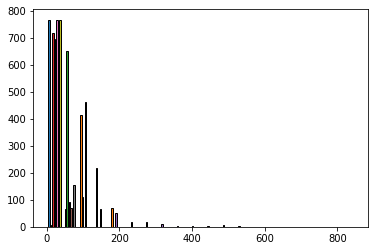

In [16]:
from scipy.stats import lognorm
plt.hist(df_copy, edgecolor='black', bins=20)

The data is not normally distributed. We have to normally distribute the dataset after spliting the data into train and test data for better accuracy during prediction.

# Data Preprocessing

In [17]:
# Splitting data into train and test dataset

X = df_copy.drop("Outcome", axis = 1)
y = df_copy["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 7)

In [18]:
# Normalizing the train data

from sklearn.preprocessing import StandardScaler

normalized_X_train = pd.DataFrame(
    StandardScaler().fit_transform(X_train),
    columns = X_train.columns)

(array([[  0.,   0.,   0.,   0., 174., 122.,  96.,  63.,  27.,  34.,  11.,
           9.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   1.,   6.,  38., 110., 123., 106.,  64.,  44.,  29.,  16.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,   2.,  18.,  29.,  68., 130., 124.,  93.,  47.,  12.,   6.,
           5.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   2.,  25.,  39.,  54.,  65., 237.,  41.,  43.,  21.,   6.,
           2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,  11.,  65., 338.,  46.,  33.,  13.,   9.,   6.,
           4.,   1.,   3.,   2.,   4.,   1.,   0.,   1.,   0.],
        [  0.,   0.,  10.,  45.,  88., 100., 141.,  80.,  39.,  22.,   7.,
           2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0., 151., 164.,  92.,  65.,  32.,   9.,  11.,
           6.,   2.,   2.,   0.,   2.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   0., 

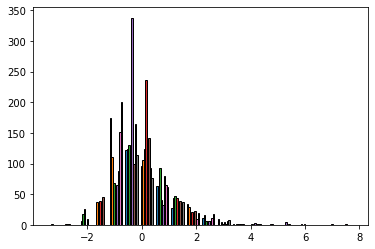

In [19]:
plt.hist(normalized_X_train, edgecolor='black', bins=20)

# Model Training

## 1. Logistic Regression

In [20]:
#model1 = LogisticRegression()
#model1.fit(X_train, y_train)
#y_predict = model1.predict(X_test)
#model_score = model1.score(X_test, y_test)

LR = LogisticRegression(
    C=0.01,
    solver='liblinear'
)
LR.fit(normalized_X_train, y_train)

normalized_X_test = pd.DataFrame(
    StandardScaler().fit_transform(X_test),
    columns = X_test.columns)


y_predict = LR.predict(normalized_X_test)

In [21]:
y_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [22]:
LR_score = LR.score(normalized_X_test, y_test)
LR_score

0.7532467532467533

In [23]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_predict)

array([[123,  24],
       [ 33,  51]])

In [24]:
# accuracy

LR_accuracy = accuracy_score(y_predict, y_test)
LR_accuracy

0.7532467532467533

## 2. SVM

In [25]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(normalized_X_train, y_train)

svc_pred = svc_model.predict(normalized_X_test)

In [26]:
svc_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [27]:
# accuracy

metrics.accuracy_score(y_test, svc_pred)

0.7705627705627706

## 3. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(normalized_X_train, y_train)

rfc_pred = rfc.predict(normalized_X_test)

In [29]:
rfc_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [30]:
# accuracy

metrics.accuracy_score(y_test, rfc_pred)

0.7532467532467533

## 4. XG Boost

In [31]:
pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(normalized_X_train, y_train)

xgb_pred = xgb_model.predict(normalized_X_test)

In [33]:
xgb_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [34]:
metrics.accuracy_score(y_test, xgb_pred)

0.6926406926406926

Out of all the models, SVM has the best accuracy, both having an accuracy of 77.05%. So we will use the SVM model for the predition of Diabetic and Non Diabetic patients.

# SVM 

Finding model's True Positive (TP), True Negative (TN), False Positive (FP) and False Negative (FN) using confusion matrix.

True Positive (TP) 

The predicted value matches the actual value, or the predicted class matches the actual class.
The actual value was positive, and the model predicted a positive value.
True Negative (TN) 

The predicted value matches the actual value, or the predicted class matches the actual class.
The actual value was negative, and the model predicted a negative value.

False Positive (FP) – Type I Error

The predicted value was falsely predicted.
The actual value was negative, but the model predicted a positive value.
Also known as the type I error.

False Negative (FN) – Type II Error

The predicted value was falsely predicted.
The actual value was positive, but the model predicted a negative value.
Also known as the type II error.

In [36]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Confusion Matrix:
[[131  16]
 [ 37  47]]


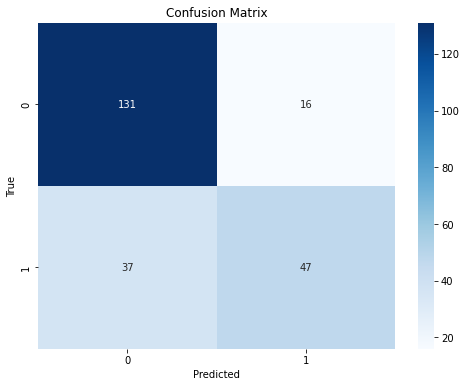

In [41]:
conf_matrix = confusion_matrix(y_test, svc_pred)
print("Confusion Matrix:")
print(conf_matrix)

labels = [0, 1]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TP - 131

TN - 47

FP - 37

FN - 16

In [42]:
report = classification_report(y_test, svc_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       147
           1       0.75      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

